In [5]:
import pandas as pd
# Ensure datasets are loaded (you might need to load these from files or define them)
df_final = pd.read_csv('/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/df_final.csv')  # Example, replace with actual loading method
df_40 = pd.read_csv('/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/df_40.csv')       # Example, replace with actual loading method
df_80 = pd.read_csv('/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/df_80.csv')       # Example, replace with actual loading method
df_120 = pd.read_csv('/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/df_120.csv')     # Example, replace with actual loading method


In [61]:
df_cluster_0_top = pd.read_csv('/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/cluster_0_users.csv')
df_cluster_1_top = pd.read_csv('/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/cluster_1_users.csv')
df_cluster_2_top = pd.read_csv('/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/cluster_2_users.csv')

In [6]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import KFold
import time

# Function to load the dataset and perform SVD
def load_and_run_svd(train_df, test_df, dataset_name):
    reader = Reader(rating_scale=(0, 5))
    train_data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)
    test_data = Dataset.load_from_df(test_df[['user_id', 'item_id', 'rating']], reader)

    kf = KFold(n_splits=5, random_state=42, shuffle=True)

    total_mse = 0
    total_rmse = 0
    total_mae = 0

    for fold, (trainset, _) in enumerate(kf.split(train_data), 1):
        model = SVD()
        model.fit(trainset)
        testset = test_data.build_full_trainset().build_testset()
        predictions = model.test(testset)

        mse = accuracy.mse(predictions)
        rmse = accuracy.rmse(predictions)
        mae = accuracy.mae(predictions)

        total_mse += mse
        total_rmse += rmse
        total_mae += mae

    avg_mse = total_mse / 5
    avg_rmse = total_rmse / 5
    avg_mae = total_mae / 5

    print(f"{dataset_name} -> MSE: {avg_mse}, RMSE: {avg_rmse}, MAE: {avg_mae}")

# Load the datasets
df_943 = df_final
df_983 = df_40
df_1023 = df_80
df_1063 = df_120

# Train on 943, test on 943
load_and_run_svd(df_943, df_943, '943 Train, 943 Test')

# Train on 983, test on 943
load_and_run_svd(df_983, df_943, '983 Train, 943 Test')

# Train on 1023, test on 943
load_and_run_svd(df_1023, df_943, '1023 Train, 943 Test')

# Train on 1063, test on 943
load_and_run_svd(df_1063, df_943, '1063 Train, 943 Test')


MSE: 0.5493
RMSE: 0.7412
MAE:  0.5807
MSE: 0.5518
RMSE: 0.7428
MAE:  0.5830
MSE: 0.5523
RMSE: 0.7431
MAE:  0.5826
MSE: 0.5523
RMSE: 0.7432
MAE:  0.5830
MSE: 0.5493
RMSE: 0.7411
MAE:  0.5811
943 Train, 943 Test -> MSE: 0.5509823386005118, RMSE: 0.7422812520085207, MAE: 0.58208657430465
MSE: 0.5550
RMSE: 0.7450
MAE:  0.5845
MSE: 0.5538
RMSE: 0.7442
MAE:  0.5834
MSE: 0.5506
RMSE: 0.7420
MAE:  0.5814
MSE: 0.5502
RMSE: 0.7417
MAE:  0.5819
MSE: 0.5505
RMSE: 0.7419
MAE:  0.5822
983 Train, 943 Test -> MSE: 0.5520080759599799, RMSE: 0.7429712536987614, MAE: 0.5826684219883186
MSE: 0.5525
RMSE: 0.7433
MAE:  0.5832
MSE: 0.5528
RMSE: 0.7435
MAE:  0.5835
MSE: 0.5538
RMSE: 0.7442
MAE:  0.5834
MSE: 0.5551
RMSE: 0.7450
MAE:  0.5853
MSE: 0.5525
RMSE: 0.7433
MAE:  0.5833
1023 Train, 943 Test -> MSE: 0.5533518205474198, RMSE: 0.7438759098067439, MAE: 0.5837388477729162
MSE: 0.5572
RMSE: 0.7465
MAE:  0.5855
MSE: 0.5599
RMSE: 0.7483
MAE:  0.5870
MSE: 0.5545
RMSE: 0.7446
MAE:  0.5838
MSE: 0.5549
RMSE: 0.744

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import KFold
import time

# Function to load the dataset and perform SVD
def load_and_run_svd(train_df, test_df, dataset_name):
    reader = Reader(rating_scale=(0, 5))
    train_data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)
    test_data = Dataset.load_from_df(test_df[['user_id', 'item_id', 'rating']], reader)

    kf = KFold(n_splits=5, random_state=42, shuffle=True)

    mse_values = []
    rmse_values = []
    mae_values = []

    for fold, (trainset, _) in enumerate(kf.split(train_data), 1):
        model = SVD()
        model.fit(trainset)
        testset = test_data.build_full_trainset().build_testset()
        predictions = model.test(testset)

        mse = accuracy.mse(predictions)
        rmse = accuracy.rmse(predictions)
        mae = accuracy.mae(predictions)

        mse_values.append(mse)
        rmse_values.append(rmse)
        mae_values.append(mae)

    avg_mse = sum(mse_values) / len(mse_values)
    avg_rmse = sum(rmse_values) / len(rmse_values)
    avg_mae = sum(mae_values) / len(mae_values)

    print(f"{dataset_name} -> MSE: {avg_mse}, RMSE: {avg_rmse}, MAE: {avg_mae}")

    # Visualization of the first 50 datapoints
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(mse_values[:50], label='MSE', color='blue')
    plt.title(f'{dataset_name} - First 50 MSE')
    plt.xlabel('Fold')
    plt.ylabel('MSE')

    plt.subplot(2, 2, 2)
    plt.plot(rmse_values[:50], label='RMSE', color='red')
    plt.title(f'{dataset_name} - First 50 RMSE')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')

    plt.subplot(2, 2, 3)
    plt.plot(mae_values[:50], label='MAE', color='green')
    plt.title(f'{dataset_name} - First 50 MAE')
    plt.xlabel('Fold')
    plt.ylabel('MAE')

    plt.tight_layout()
    plt.show()

# Load the datasets
df_943 = df_final
df_983 = df_40
df_1023 = df_80
df_1063 = df_120

# Train on 943, test on 943
load_and_run_svd(df_943, df_943, '943 Train, 943 Test')

# Train on 983, test on 943
load_and_run_svd(df_983, df_943, '983 Train, 943 Test')

# Train on 1023, test on 943
load_and_run_svd(df_1023, df_943, '1023 Train, 943 Test')

# Train on 1063, test on 943
load_and_run_svd(df_1063, df_943, '1063 Train, 943 Test')


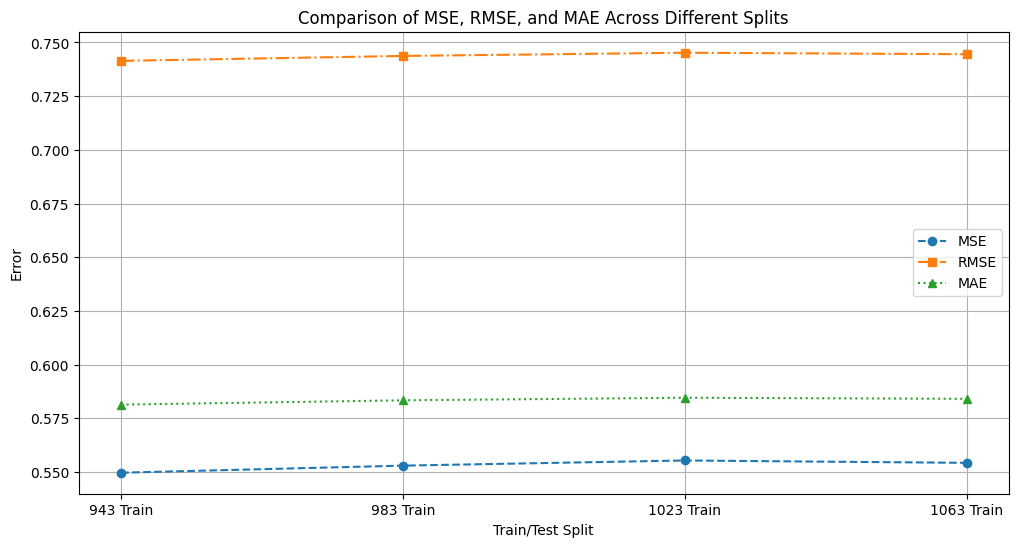

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data for train/test splits
splits = ['943 Train', '983 Train', '1023 Train', '1063 Train']

# MSE, RMSE, and MAE values
mse_values = [0.5497, 0.5530, 0.5554, 0.5543]
rmse_values = [0.7414, 0.7437, 0.7452, 0.7445]
mae_values = [0.5814, 0.5834, 0.5846, 0.5841]

x = np.arange(len(splits))  # X-axis positions

# Plot MSE
plt.figure(figsize=(12, 6))
plt.plot(x, mse_values, marker='o', label='MSE', linestyle='--')
plt.plot(x, rmse_values, marker='s', label='RMSE', linestyle='-.')
plt.plot(x, mae_values, marker='^', label='MAE', linestyle=':')

# Add labels and title
plt.xticks(x, splits)
plt.xlabel('Train/Test Split')
plt.ylabel('Error')
plt.title('Comparison of MSE, RMSE, and MAE Across Different Splits')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



In [9]:
import pandas as pd

comparison_steps = [
    {"Step": 1, "Task": "Train model A on df_final (100k)"},
    {"Step": 2, "Task": "Train model B on df101k (biased)"},
    {"Step": 3, "Task": "Predict both on same test set (df_final)"},
    {"Step": 4, "Task": "Compare RMSE, Top-10 recommendations, and Hit Rate"},
    {"Step": 5, "Task": "Interpret the difference: did bias help or hurt?"}
]

df_comparison = pd.DataFrame(comparison_steps)
df_comparison


,Step,Task
0,1,Train model A on df_final (100k)
1,2,Train model B on df101k (biased)
2,3,Predict both on same test set (df_final)
3,4,"Compare RMSE, Top-10 recommendations, and Hit ..."
4,5,Interpret the difference: did bias help or hurt?


top-10

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

# Define a function to apply SVD and generate top 10 recommendations for all users
def generate_top10_recommendations(df):
    # Create the user-item matrix
    user_item_matrix = df.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

    # Convert user-item matrix to a sparse matrix
    user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

    # Apply SVD on the sparse matrix
    U, sigma, Vt = svds(user_item_matrix_sparse, k=50)  # k is the number of latent factors
    sigma = np.diag(sigma)

    # Reconstruct predicted ratings matrix
    predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Convert predicted ratings back to a DataFrame
    predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)

    # Generate top 10 recommendations for all users
    top_recommendations = []

    for user_id in user_item_matrix.index:
        # Get predictions for the user
        user_predictions = predicted_ratings_df.loc[user_id]
        
        # Get items the user has not rated yet
        already_rated = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()
        unrated_items = user_predictions.drop(index=already_rated)
        
        # Get top 10 recommendations
        top_10_items = unrated_items.sort_values(ascending=False).head(10)
        
        # Store recommendations in descending order
        for item_id, score in top_10_items.items():
            top_recommendations.append({'user_id': user_id, 'item_id': item_id, 'predicted_rating': score})

    # Create a DataFrame with all top 10 recommendations
    recommendations_df = pd.DataFrame(top_recommendations).sort_values(by=['user_id', 'predicted_rating'], ascending=[True, False])
    
    return recommendations_df

# Generate recommendations for each dataset
top10_df_final = generate_top10_recommendations(df_final)
top10_df_40 = generate_top10_recommendations(df_40)
top10_df_80 = generate_top10_recommendations(df_80)
top10_df_120 = generate_top10_recommendations(df_120)

# Merge function to join recommendations with df_final on item_id to include the decade
def merge_with_decade_on_item_id(recommendations_df, df_final):
    # Select only necessary columns from df_final and drop duplicates
    df_final_subset = df_final[['item_id', 'decade']].drop_duplicates()

    # Merge on item_id to add decade
    merged_df = pd.merge(recommendations_df, df_final_subset, on='item_id', how='left')
    
    return merged_df

# Merge each recommendation DataFrame with df_final to add the decade
top10_df_final_with_decade = merge_with_decade_on_item_id(top10_df_final, df_final)
top10_df_40_with_decade = merge_with_decade_on_item_id(top10_df_40, df_final)
top10_df_80_with_decade = merge_with_decade_on_item_id(top10_df_80, df_final)
top10_df_120_with_decade = merge_with_decade_on_item_id(top10_df_120, df_final)

# Save the DataFrames as CSV files in the result directory
# top10_df_final_with_decade.to_csv('result/top10_df_final_with_decade.csv', index=False)
# top10_df_40_with_decade.to_csv('result/top10_df_40_with_decade.csv', index=False)
# top10_df_80_with_decade.to_csv('result/top10_df_80_with_decade.csv', index=False)
# top10_df_120_with_decade.to_csv('result/top10_df_120_with_decade.csv', index=False)

# print("All recommendation files have been successfully saved in the 'result' directory.")

# Display the first few rows to verify the results
#top10_df_final_with_decade.head(), top10_df_40_with_decade.head(), top10_df_80_with_decade.head(), top10_df_120_with_decade.head()


All recommendation files have been successfully saved in the 'result' directory.


In [ ]:
# Find the cluster for user_id == 1
user_cluster_1 = user_entropy[user_entropy['user_id'] == 510]['cluster'].values[0]

# Print the result
print(f"User_id 1 belongs to cluster: {user_cluster_1}")


User_id 1 belongs to cluster: 509    0
Name: cluster, dtype: int64


In [101]:
top10_df_120_with_decade[top10_df_120_with_decade['user_id'] == 758]

,user_id,item_id,predicted_rating,decade
7570,758,318,3.620780,1990.0
7571,758,485,3.378863,1960.0
7572,758,443,3.125320,1960.0
7573,758,1011,2.962599,1990.0
7574,758,631,2.876179,1990.0
7575,758,357,2.680112,1970.0
7576,758,2,2.633533,1990.0
7577,758,659,2.623670,1940.0
7578,758,89,2.597527,1980.0
7579,758,847,2.573142,1990.0


In [100]:
top10_df_80_with_decade[top10_df_80_with_decade['user_id'] == 758]

,user_id,item_id,predicted_rating,decade
7570,758,318,3.650258,1990.0
7571,758,485,3.394210,1960.0
7572,758,443,3.151988,1960.0
7573,758,1011,3.052702,1990.0
7574,758,631,2.904692,1990.0
7575,758,2,2.651644,1990.0
7576,758,89,2.643726,1980.0
7577,758,357,2.624617,1970.0
7578,758,42,2.583637,1990.0
7579,758,659,2.576959,1940.0


In [99]:
top10_df_40_with_decade[top10_df_40_with_decade['user_id'] == 758]

,user_id,item_id,predicted_rating,decade
7570,758,318,3.489308,1990.0
7571,758,485,3.292408,1960.0
7572,758,1011,3.119053,1990.0
7573,758,449,2.998002,1970.0
7574,758,97,2.791644,1990.0
7575,758,156,2.748706,1990.0
7576,758,89,2.656437,1980.0
7577,758,161,2.626525,1980.0
7578,758,2,2.607612,1990.0
7579,758,226,2.554273,1990.0


In [98]:
top10_df_final_with_decade[top10_df_final_with_decade['user_id'] == 758]

,user_id,item_id,predicted_rating,decade
7570,758,318,3.675449,1990.0
7571,758,1011,3.225391,1990.0
7572,758,97,2.752071,1990.0
7573,758,591,2.746481,1990.0
7574,758,485,2.703483,1960.0
7575,758,449,2.547022,1970.0
7576,758,423,2.543086,1980.0
7577,758,847,2.508296,1990.0
7578,758,161,2.456977,1980.0
7579,758,156,2.349081,1990.0


In [103]:
# ---- Cluster 0 ----
print("----cluster 0:----")
user_cluster = user_entropy[user_entropy['user_id'] == 510]['cluster'].values[0]
print(f"User_id 510 belongs to cluster: {user_cluster}")

print("-------0:--------")
print(top10_df_final_with_decade[(top10_df_final_with_decade['user_id'] == 510) & (top10_df_final_with_decade['item_id'] == 328)])
print("-------40:--------")
print(top10_df_40_with_decade[(top10_df_40_with_decade['user_id'] == 510) & (top10_df_40_with_decade['item_id'] == 328)])
print("-------80:--------")
print(top10_df_80_with_decade[(top10_df_80_with_decade['user_id'] == 510) & (top10_df_80_with_decade['item_id'] == 328)])
print("-------120:--------")
print(top10_df_120_with_decade[(top10_df_120_with_decade['user_id'] == 510) & (top10_df_120_with_decade['item_id'] == 328)])
print("\n")

# ---- Cluster 1 ----
print("----cluster 1:----")
user_cluster = user_entropy[user_entropy['user_id'] == 758]['cluster'].values[0]
print(f"User_id 758 belongs to cluster: {user_cluster}")

print("-------0:--------")
print(top10_df_final_with_decade[(top10_df_final_with_decade['user_id'] == 758) & (top10_df_final_with_decade['item_id'] == 318)])
print("-------40:--------")
print(top10_df_40_with_decade[(top10_df_40_with_decade['user_id'] == 758) & (top10_df_40_with_decade['item_id'] == 318)])
print("-------80:--------")
print(top10_df_80_with_decade[(top10_df_80_with_decade['user_id'] == 758) & (top10_df_80_with_decade['item_id'] == 318)])
print("-------120:--------")
print(top10_df_120_with_decade[(top10_df_120_with_decade['user_id'] == 758) & (top10_df_120_with_decade['item_id'] == 318)])
print("\n")

# ---- Cluster 2 ----
print("----cluster 2:----")
user_cluster = user_entropy[user_entropy['user_id'] == 123]['cluster'].values[0]
print(f"User_id 123 belongs to cluster: {user_cluster}")

print("-------0:--------")
print(top10_df_final_with_decade[(top10_df_final_with_decade['user_id'] == 123) & (top10_df_final_with_decade['item_id'] == 474)])
print("-------40:--------")
print(top10_df_40_with_decade[(top10_df_40_with_decade['user_id'] == 123) & (top10_df_40_with_decade['item_id'] == 474)])
print("-------80:--------")
print(top10_df_80_with_decade[(top10_df_80_with_decade['user_id'] == 123) & (top10_df_80_with_decade['item_id'] == 474)])
print("-------120:--------")
print(top10_df_120_with_decade[(top10_df_120_with_decade['user_id'] == 123) & (top10_df_120_with_decade['item_id'] == 474)])


----cluster 0:----
User_id 510 belongs to cluster: 0
-------0:--------
      user_id  item_id  predicted_rating  decade
5090      510      328          3.004904  1990.0
-------40:--------
      user_id  item_id  predicted_rating  decade
5090      510      328           3.07647  1990.0
-------80:--------
      user_id  item_id  predicted_rating  decade
5090      510      328          3.045866  1990.0
-------120:--------
      user_id  item_id  predicted_rating  decade
5090      510      328          3.030932  1990.0


----cluster 1:----
User_id 758 belongs to cluster: 1
-------0:--------
      user_id  item_id  predicted_rating  decade
7570      758      318          3.675449  1990.0
-------40:--------
      user_id  item_id  predicted_rating  decade
7570      758      318          3.489308  1990.0
-------80:--------
      user_id  item_id  predicted_rating  decade
7570      758      318          3.650258  1990.0
-------120:--------
      user_id  item_id  predicted_rating  decade
7570 

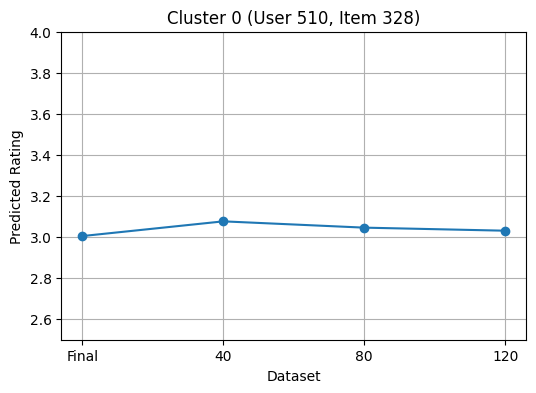

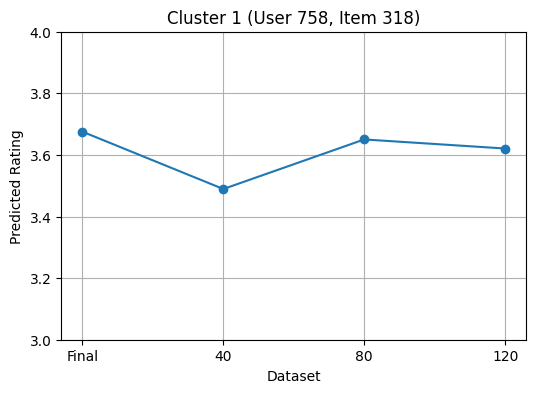

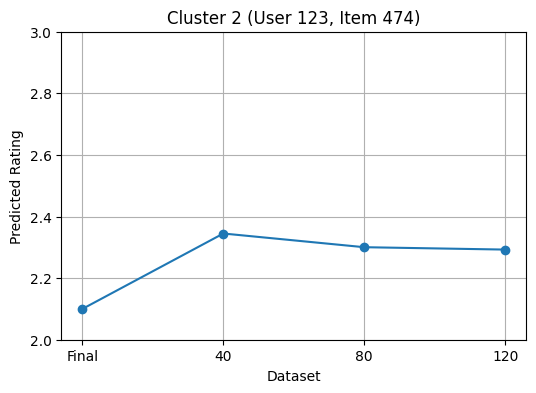

In [106]:
import matplotlib.pyplot as plt

# X-axis labels representing the four DataFrames/datasets
x_labels = ["Final", "40", "80", "120"]

# ---------------------------------------------------
# Cluster 0 Plot: User 510, Item 328
y_cluster0 = [
    top10_df_final_with_decade[(top10_df_final_with_decade['user_id'] == 510) & (top10_df_final_with_decade['item_id'] == 328)]['predicted_rating'].values[0],
    top10_df_40_with_decade[(top10_df_40_with_decade['user_id'] == 510) & (top10_df_40_with_decade['item_id'] == 328)]['predicted_rating'].values[0],
    top10_df_80_with_decade[(top10_df_80_with_decade['user_id'] == 510) & (top10_df_80_with_decade['item_id'] == 328)]['predicted_rating'].values[0],
    top10_df_120_with_decade[(top10_df_120_with_decade['user_id'] == 510) & (top10_df_120_with_decade['item_id'] == 328)]['predicted_rating'].values[0]
]

plt.figure(figsize=(6, 4))
plt.plot(x_labels, y_cluster0, marker='o', linestyle='-')
plt.title("Cluster 0 (User 510, Item 328)")
plt.xlabel("Dataset")
plt.ylabel("Predicted Rating")
plt.ylim(2.5, 4)  # Adjust the y-axis range if needed
plt.grid(True)
plt.show()

# ---------------------------------------------------
# Cluster 1 Plot: User 758, Item 318
y_cluster1 = [
    top10_df_final_with_decade[(top10_df_final_with_decade['user_id'] == 758) & (top10_df_final_with_decade['item_id'] == 318)]['predicted_rating'].values[0],
    top10_df_40_with_decade[(top10_df_40_with_decade['user_id'] == 758) & (top10_df_40_with_decade['item_id'] == 318)]['predicted_rating'].values[0],
    top10_df_80_with_decade[(top10_df_80_with_decade['user_id'] == 758) & (top10_df_80_with_decade['item_id'] == 318)]['predicted_rating'].values[0],
    top10_df_120_with_decade[(top10_df_120_with_decade['user_id'] == 758) & (top10_df_120_with_decade['item_id'] == 318)]['predicted_rating'].values[0]
]

plt.figure(figsize=(6, 4))
plt.plot(x_labels, y_cluster1, marker='o', linestyle='-')
plt.title("Cluster 1 (User 758, Item 318)")
plt.xlabel("Dataset")
plt.ylabel("Predicted Rating")
plt.ylim(3, 4)  # Adjust the y-axis range if needed
plt.grid(True)
plt.show()

# ---------------------------------------------------
# Cluster 2 Plot: User 123, Item 474
y_cluster2 = [
    top10_df_final_with_decade[(top10_df_final_with_decade['user_id'] == 123) & (top10_df_final_with_decade['item_id'] == 474)]['predicted_rating'].values[0],
    top10_df_40_with_decade[(top10_df_40_with_decade['user_id'] == 123) & (top10_df_40_with_decade['item_id'] == 474)]['predicted_rating'].values[0],
    top10_df_80_with_decade[(top10_df_80_with_decade['user_id'] == 123) & (top10_df_80_with_decade['item_id'] == 474)]['predicted_rating'].values[0],
    top10_df_120_with_decade[(top10_df_120_with_decade['user_id'] == 123) & (top10_df_120_with_decade['item_id'] == 474)]['predicted_rating'].values[0]
]

plt.figure(figsize=(6, 4))
plt.plot(x_labels, y_cluster2, marker='o', linestyle='-')
plt.title("Cluster 2 (User 123, Item 474)")
plt.xlabel("Dataset")
plt.ylabel("Predicted Rating")
plt.ylim(2, 3)  # Adjust the y-axis range if needed
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Cluster 0 - User 510
cluster_0 = pd.DataFrame({
    'dataset': ['0', '40', '80', '120'],
    'predicted_rating': [3.004904, 3.07647, 3.045866, 3.030932]
})

# Cluster 1 - User 758
cluster_1 = pd.DataFrame({
    'dataset': ['0', '40', '80', '120'],
    'predicted_rating': [3.675449, 3.489308, 3.650258, 3.62078]
})

# Cluster 2 - User 123
cluster_2 = pd.DataFrame({
    'dataset': ['0', '40', '80', '120'],
    'predicted_rating': [2.100041, 2.344841, 2.300388, 2.292651]
})

# Plot for Cluster 0
plt.figure(figsize=(6, 4))
plt.plot(cluster_0['dataset'], cluster_0['predicted_rating'], marker='o')
plt.title('Predicted Ratings for User 510 (Cluster 0)')
plt.xlabel('Dataset')
plt.ylabel('Predicted Rating')
plt.grid(True)
plt.show()

# Plot for Cluster 1
plt.figure(figsize=(6, 4))
plt.plot(cluster_1['dataset'], cluster_1['predicted_rating'], marker='o')
plt.title('Predicted Ratings for User 758 (Cluster 1)')
plt.xlabel('Dataset')
plt.ylabel('Predicted Rating')
plt.grid(True)
plt.show()

# Plot for Cluster 2
plt.figure(figsize=(6, 4))
plt.plot(cluster_2['dataset'], cluster_2['predicted_rating'], marker='o')
plt.title('Predicted Ratings for User 123 (Cluster 2)')
plt.xlabel('Dataset')
plt.ylabel('Predicted Rating')
plt.grid(True)
plt.show()


In [90]:
df_final[(df_final['user_id'] == 123) & (df_final['item_id'] == 474)]

,user_id,item_id,rating,decade


In [92]:
df_cluster_2_top[(df_cluster_2_top['user_id'] == 123)]

,user_id,num_ratings
39,123,54


In [23]:
# Check if user_id 1 has rated item_id 276
rating_check = df_final[(df_final['user_id'] == 112) & (df_final['item_id'] == 276)]

# Check if the DataFrame is not empty
if not rating_check.empty:
    print(f"User 1 has rated item 276. Rating: {rating_check['rating'].values[0]}")
else:
    print("User 1 has not rated item 276.")


User 1 has not rated item 276.


In [25]:
from sklearn.metrics import ndcg_score
import numpy as np

# Function to calculate Precision@k
def precision_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return len(relevant_items & recommended_items) / k

# Function to calculate Recall@k
def recall_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return len(relevant_items & recommended_items) / len(relevant_items)

# Function to calculate Hit Rate@k
def hit_rate_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return 1 if len(relevant_items & recommended_items) > 0 else 0

# Function to calculate Jaccard Similarity between two sets
def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2)

# Example: Compare recommendations for a sample user
actual_items = [276, 474, 732, 423, 403]  # Example: Actual items the user rated
predicted_items_df_final = [423, 403, 732, 276, 357]  # Predicted by df_final
predicted_items_df_40 = [732, 474, 582, 276, 515]  # Predicted by df_40

# Calculate Precision@10 and Recall@10 for df_final and df_40
precision_df_final = precision_at_k(actual_items, predicted_items_df_final, k=5)
recall_df_final = recall_at_k(actual_items, predicted_items_df_final, k=5)

precision_df_40 = precision_at_k(actual_items, predicted_items_df_40, k=5)
recall_df_40 = recall_at_k(actual_items, predicted_items_df_40, k=5)

# Jaccard Similarity between predictions of df_final and df_40
jaccard_score = jaccard_similarity(set(predicted_items_df_final), set(predicted_items_df_40))

print(f"Precision@5 for df_final: {precision_df_final:.4f}")
print(f"Recall@5 for df_final: {recall_df_final:.4f}")
print(f"Precision@5 for df_40: {precision_df_40:.4f}")
print(f"Recall@5 for df_40: {recall_df_40:.4f}")
print(f"Jaccard Similarity between df_final and df_40: {jaccard_score:.4f}")


Precision@5 for df_final: 0.8000
Recall@5 for df_final: 0.8000
Precision@5 for df_40: 0.6000
Recall@5 for df_40: 0.6000
Jaccard Similarity between df_final and df_40: 0.2500


Cross-Validation vs Train-Test Split
The first code uses cross-validation (cross_validate function from Surprise library), which splits the data into training and testing sets multiple times (in this case, 5 times). The model is trained and evaluated on each split, and the average performance metrics (RMSE, MAE) are calculated.
The second code uses a single train-test split (train_test_split function from Surprise library), where the data is split into training and testing sets only once. The model is trained on the training set and evaluated on the testing set.

In [180]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
import pandas as pd

# Step 1: Load datasets

reader = Reader(rating_scale=(0, 5))
data_943k = Dataset.load_from_df(df_final[['user_id', 'item_id', 'rating']], reader)
data_983k = Dataset.load_from_df(df_40[['user_id', 'item_id', 'rating']], reader)

# Step 2: Define model (same for both)
model_943k = SVD()
model_983k = SVD()

# Step 3: Cross-validation
results_943k = cross_validate(model_943k, data_943k, measures=['RMSE', 'MAE'], cv=5, verbose=False)
results_983k = cross_validate(model_983k, data_983k, measures=['RMSE', 'MAE'], cv=5, verbose=False)

# Step 4: Compute average scores
avg_rmse_943k = sum(results_943k['test_rmse']) / len(results_943k['test_rmse'])
avg_mae_943k = sum(results_943k['test_mae']) / len(results_943k['test_mae'])

avg_rmse_983k = sum(results_983k['test_rmse']) / len(results_983k['test_rmse'])
avg_mae_983k = sum(results_983k['test_mae']) / len(results_983k['test_mae'])

# Step 5: Print comparison
print("📊 Cross-Validation Results (5-fold)")
print(f"Original 943k → RMSE: {avg_rmse_943k:.4f}, MAE: {avg_mae_943k:.4f}")
print(f"Biased 983k  → RMSE: {avg_rmse_983k:.4f}, MAE: {avg_mae_983k:.4f}")


📊 Cross-Validation Results (5-fold)
Original 943k → RMSE: 0.9372, MAE: 0.7387
Biased 983k  → RMSE: 0.7391, MAE: 0.4965


✅ Step 2: Train on All 100k Data & Recommend Top-10 Items per User

In [ ]:
# Search for user_id 196
user_196_df = df_final[df_final['user_id'] == 196]

# Display the results
print(user_196_df)

In [97]:
# Step 1: Train Model B on full 101k dataset
trainset_101k = data_101k.build_full_trainset()
model_b = SVD()
model_b.fit(trainset_101k)

# Step 2: Use the same users from df_final (100k), and items from 101k
test_users = df_final['user_id'].unique()
all_items_101k = df_101_SVD['item_id'].unique()

# Step 3: Items already rated by test users (from df_final)
user_rated_items = df_final.groupby('user_id')['item_id'].apply(set).to_dict()

# Step 4: Predict on unseen items and get Top-10
top_10_recommendations_b = defaultdict(list)

for uid in test_users:
    seen = user_rated_items.get(uid, set())
    unseen = [iid for iid in all_items_101k if iid not in seen]

    predictions = [(iid, model_b.predict(uid, iid).est) for iid in unseen]
    top_10 = sorted(predictions, key=lambda x: x[1], reverse=True)[:10]
    top_10_recommendations_b[uid] = top_10

# Step 5: Convert to DataFrame
top_10_b_df = pd.DataFrame([
    [uid, iid, pred] for uid, recs in top_10_recommendations_b.items() for iid, pred in recs
], columns=['User ID', 'Recommended Item', 'Predicted Rating'])

# Save the recommendations
top_10_b_df.to_csv("B-top10_recommendations_101k.csv", index=False)
print("✅ B - Top-10 recommendations from 101k saved.")


✅ B - Top-10 recommendations from 101k saved.


Evaluation

✅ 1. Hit Rate
Definition: Fraction of users for whom at least 1 of the Top-10 recommended items was actually rated.

In [98]:
# Load Top-10s if needed
top10_A_df = pd.read_csv("A-top10_recommendations_100k.csv")
top10_B_df = pd.read_csv("B-top10_recommendations_101k.csv")

# Ground truth (actual user ratings in 100k)
ground_truth = df_final.copy()

# Build lookup: items each user actually rated
user_actual_items = ground_truth.groupby('user_id')['item_id'].apply(set).to_dict()

✅ 2. Precision@10
Definition: For each user, how many of the Top-10 recommendations were actually rated?
Then average across users.

In [113]:
def compute_precision_at_10(top_10_df, user_actual_items):
    precision_sum = 0
    total_users = top_10_df['User ID'].nunique()

    for user, group in top_10_df.groupby('User ID'):
        rec_items = set(group['Recommended Item'])
        actual_items = user_actual_items.get(user, set())
        true_positives = len(rec_items & actual_items)
        precision_sum += true_positives / 10  # Top-10 list

    return precision_sum / total_users


✅ 3. Recommendation Overlap
Definition: For each user, compute overlap between Top-10 items from Model A and B.